In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import cv2 as cv
import os
import keras

In [ ]:
DataDir = "/content/drive/MyDrive/AIP391_Group3_Facial_Expression/Data/New Data/train" # training dataset
TestDir = "/content/drive/MyDrive/AIP391_Group3_Facial_Expression/Data/New Data/test"
Classes = ['angry', 'happy', 'neutral', 'sad', 'surprise'] # list of classes
from tensorflow.keras.utils import to_categorical

def create_data(data):
  X, y = [], []
  for Class in Classes:
      path = os.path.join(data, Class)
      class_num = Classes.index(Class) # Label
      for img in os.listdir(path):
          try:
              img_array = cv.imread(os.path.join(path, img), 0)
              X.append(img_array)
              y.append(class_num)
          except Exception as e:
              pass

  return np.array(X), to_categorical(np.array(y), num_classes=5)

X_train, y_train = create_data(DataDir)
X_test, y_test = create_data(TestDir)

In [ ]:
y_train.shape

(49176, 5)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

In [ ]:
datagen.fit(X_train)

In [ ]:
testgen = ImageDataGenerator(rescale=1./255)
batch_size = 64

In [ ]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def get_model(input_shape=(48,48,1)):
# first input model
  visible = Input(shape=input_shape, name='input')
  num_classes = 5

  #the 1-st block
  conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
  conv1_1 = BatchNormalization()(conv1_1)
  conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
  conv1_2 = BatchNormalization()(conv1_2)
  pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
  drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

  #the 2-nd block
  conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
  conv2_1 = BatchNormalization()(conv2_1)
  conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
  conv2_2 = BatchNormalization()(conv2_2)
  conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
  conv2_2 = BatchNormalization()(conv2_3)
  pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
  drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

  #the 3-rd block
  conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
  conv3_1 = BatchNormalization()(conv3_1)
  conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
  conv3_2 = BatchNormalization()(conv3_2)
  conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
  conv3_3 = BatchNormalization()(conv3_3)
  conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
  conv3_4 = BatchNormalization()(conv3_4)
  pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
  drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1) 
  
  #the 4-th block
  conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
  conv4_1 = BatchNormalization()(conv4_1)
  conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
  conv4_2 = BatchNormalization()(conv4_2)
  conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
  conv4_3 = BatchNormalization()(conv4_3)
  conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
  conv4_4 = BatchNormalization()(conv4_4)
  pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
  drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
  
  #the 5-th block
  conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
  conv5_1 = BatchNormalization()(conv5_1)
  conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
  conv5_2 = BatchNormalization()(conv5_2)
  conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
  conv5_3 = BatchNormalization()(conv5_3)
  conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
  conv5_3 = BatchNormalization()(conv5_3)
  pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
  drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)
  
  #Flatten and output
  flatten = Flatten(name = 'flatten')(drop5_1)
  ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
  model = Model(inputs =visible, outputs = ouput)
  
  # summary layers
  print(model.summary())
  
  return model

In [ ]:
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

In [ ]:
num_epochs = 100  
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=test_flow,
                    validation_steps=len(X_test) / batch_size)

model.save('/content/drive/MyDrive/AIP391_Group3_Facial_Expression/Models/CNN_model_V2.h5')

<Figure size 432x288 with 0 Axes>

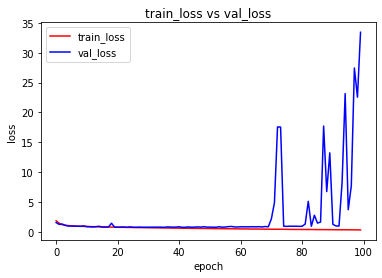

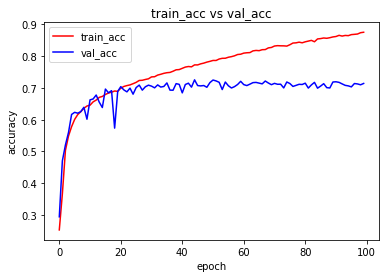

<Figure size 432x288 with 0 Axes>

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [ ]:
loss = model.evaluate(X_test/255., y_test) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

267/267 [==============================] - 9s 31ms/step - loss: 33.4363 - accuracy: 0.7139
Test Loss 33.436256408691406
Test Acc: 0.7139178514480591
